# Problem Statement:-
# This case requires to develop a model for predicting fraudulent transaction for a financial company and use the insights from the model to develop an actionable plan.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
#Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

In [2]:
df= pd.read_csv('D:/data science/Job Folder/New_Accredian/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
df.shape

(6362620, 11)

In [9]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

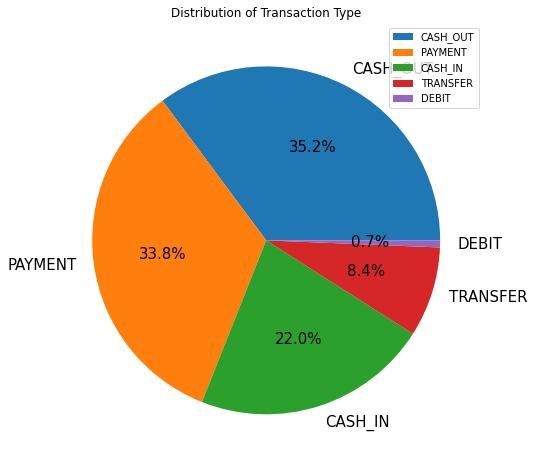

In [10]:
payment_type= df['type'].value_counts().index
payment_values= df['type'].value_counts().values
plt.figure(figsize=(10,8))
plt.pie(payment_values, labels = payment_type,autopct='%1.1f%%',textprops={'fontsize': 15})
plt.legend()
plt.title('Distribution of Transaction Type')
plt.show()

In [11]:
#Checking correlation
correlation= df.corr()
print(correlation['isFraud'].sort_values(ascending= False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [12]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

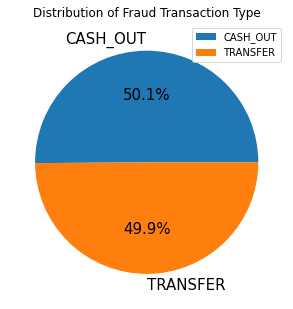

In [13]:
fraud_type= df[df['isFraud']==1]
payment_type= fraud_type['type'].value_counts().index
payment_values= fraud_type['type'].value_counts().values
plt.figure(figsize=(5,8))
plt.pie(payment_values, labels = payment_type,autopct='%1.1f%%',textprops={'fontsize': 15})
plt.legend()
plt.title('Distribution of Fraud Transaction Type')
plt.show()

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Checking the account balance is matching before transaction and after the transaction for both originator and recipient

In [15]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

df['origBalance_inacc'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['destBalance_inacc'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(df['origBalance_inacc'].value_counts()[1]/df.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(df['destBalance_inacc'].value_counts()[1]/df.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


In [16]:
print("Number of transactions with amount is less 0?")
print(len(df[df['amount']<0]))

print("Number of transactions with amount is equal to 0?")
print(len(df[df['amount']==0]))

Number of transactions with amount is less 0?
0
Number of transactions with amount is equal to 0?
16


In [17]:
#Checking whether the Falgged transactions are Fraudulent ones or not ?
df_temp=df[df['isFlaggedFraud']==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(df_temp))

print("What type of transactions are they?")
print("\t",df_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",df_temp['isFraud'].value_counts()[1] == len(df_temp))

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True


All the fraud trnasactions belong to Transfer or Cash-out type, So, I am combinig all the type of payments(PAYMENT, CASH-IN and DEBIT) other than CASH-OUT and TRANSFER as OTHERS.

In [18]:
type_payment= {'PAYMENT':'OTHERS','TRANSFER':'TRANSFER',
               'CASH_OUT':'CASH_OUT','DEBIT':'OTHERS',
               'CASH_IN':'OTHERS'}

In [19]:
df['type']= df['type'].map(type_payment)
df['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

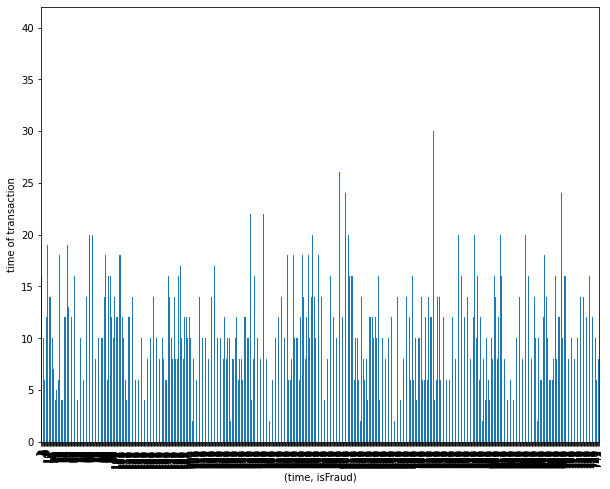

In [20]:
#Fraud and Non-Fraud Transactions Count by Time Step
fraud= df['isFraud'].isin([1])
plt.figure(figsize=(10,8))
fraud_time = df[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

The fraud transactions are almost uniformly spread out across time steps, so this variable is not giving us any information which might impact the target variable. so its better to drop this variable.

In [21]:
# plt.boxplot(df['amount'])
# plt.show()

In [22]:
# df["log_amount"]=np.log(df["amount"].values+1)
# plt.boxplot(df['log_amount'])
# plt.show()

In [23]:
# df=df[(df["log_amount"]>5.5) & (df["log_amount"]<16) ]
# plt.boxplot(df['log_amount'])
# plt.show()

### Train Test Split

In [24]:
X = df.drop(columns=['step','amount', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])
X.head()

,type,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,OTHERS,160296.36,0.0,0,1
1,OTHERS,19384.72,0.0,0,1
2,TRANSFER,0.00,0.0,0,1
3,CASH_OUT,0.00,21182.0,0,1
4,OTHERS,29885.86,0.0,0,1


In [25]:
y = df['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Data Preprocessing

#### One Hot Encoding
##### Preprocessing of Train data

In [27]:
dummies_type = pd.get_dummies(X_train['type'], prefix='type')
X_train = pd.concat([X_train, dummies_type], axis=1)
X_train = X_train.drop(columns=['type'])
X_train.head()

,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_CASH_OUT,type_OTHERS,type_TRANSFER
2408104,54292.98,7175503.03,1,1,0,1,0
662430,0.00,3731846.57,1,1,1,0,0
496595,0.00,3329828.01,1,1,0,0,1
5053741,28945.58,0.00,1,1,0,1,0
755621,0.00,182350.43,1,1,1,0,0


##### Preprocessing of Test data

In [28]:
dummies_type = pd.get_dummies(X_test['type'], prefix='type')
X_test = pd.concat([X_test, dummies_type], axis=1)
X_test = X_test.drop(columns=['type'])
X_test.head()

,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_CASH_OUT,type_OTHERS,type_TRANSFER
3737323,351084.42,452419.57,1,1,0,1,0
264914,18722.92,0.00,0,1,0,1,0
85647,258853.21,201303.01,1,1,0,1,0
5899326,0.00,3198359.45,1,0,0,0,1
2544263,2999503.88,415821.90,1,1,0,1,0


### Model Implementation

#### Logistic Regrassion

In [29]:
lr = LogisticRegression(class_weight="balanced")

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9995379262002131


In [30]:
rf = RandomForestClassifier(class_weight="balanced")
rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9999895221360593

In [31]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [32]:
predictors = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   

                newbalanceDest  
amount                0.459304  
oldbalanceOrg         0.042029  
newbalanceOrig        0.041837  
oldbalanceDest        0.976569  
newbalanceDest        1.000000  


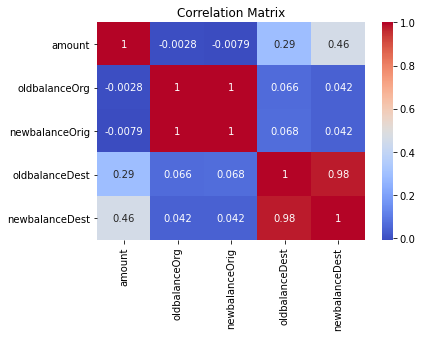

In [33]:
correlation_matrix = predictors.corr()
print(correlation_matrix)

# Heatmap visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Adding a constant column to predictors DataFrame for VIF calculation
X = add_constant(predictors)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          feature         VIF
0           const    1.249912
1          amount    3.704164
2   oldbalanceOrg  430.052765
3  newbalanceOrig  431.093970
4  oldbalanceDest   64.982048
5  newbalanceDest   74.887727
